# Imports

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
sns.set()

## **(Tutorial) Binarizing data**

Following is a sample of binarizing listen counts in Million Song Dataset
### The Echo Nest Taste Profile Subset 
http://labrosa.ee.columbia.edu/millionsong/sites/default/files/challenge/train_triplets.txt.zip

In [2]:
listen_count = pd.read_csv('/Users/laptopcheckout/Downloads/ICE_3_train_triplets-2.txt', header=None, delimiter='\t')
listen_count.shape


(48373586, 3)

In [3]:
listen_count.head()  # user - song - count

,0,1,2
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [4]:
np.max(listen_count[2])

9667

Binarizing and visualizing listen counts

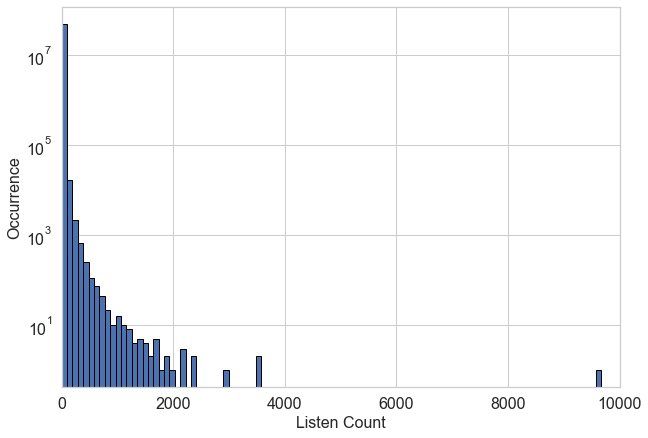

In [5]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.hist(listen_count[2], bins = 100, edgecolor='black')
plt.yscale('log', nonpositive='clip')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim([0,10000])
_ = plt.xlabel('Listen Count', fontsize=16)
_ = plt.ylabel('Occurrence', fontsize=16)

## **Task 1.1 Read data from Athletes.xlsx file and keep it in a proper type for the following operations**

### The athletes information of 2021 Olympics in Tokyo
https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo/download

In [6]:
# write your code here

#importing data from xlsx
athletes_count = pd.read_excel('/Users/laptopcheckout/Downloads/archive/Athletes.xlsx',index_col=0)
print(athletes_count.head())

                      NOC           Discipline
Name                                          
AALERUD Katrine    Norway         Cycling Road
ABAD Nestor         Spain  Artistic Gymnastics
ABAGNALE Giovanni   Italy               Rowing
ABALDE Alberto      Spain           Basketball
ABALDE Tamara       Spain           Basketball


## **Task 1.2 Extracting the data in column 'NOC' and encoding them, then binarizing and visualizing them (number of athletes on x-axis, number of countries on y-axis)**

In [7]:
#Creating an instance of LabelEncoder
label_encoder = preprocessing.LabelEncoder()
#Assisng numerical values and storing it in another column called "NOC_N"
athletes_count['NOC_N'] = label_encoder.fit_transform(athletes_count['NOC'])
print(athletes_count)
#
df =athletes_count['NOC_N'].value_counts()
df


                           NOC           Discipline  NOC_N
Name                                                      
AALERUD Katrine         Norway         Cycling Road    136
ABAD Nestor              Spain  Artistic Gymnastics    174
ABAGNALE Giovanni        Italy               Rowing     92
ABALDE Alberto           Spain           Basketball    174
ABALDE Tamara            Spain           Basketball    174
...                        ...                  ...    ...
ZWICKER Martin Detlef  Germany               Hockey     71
ZWOLINSKA Klaudia       Poland         Canoe Slalom    147
ZYKOVA Yulia               ROC             Shooting    151
ZYUZINA Ekaterina          ROC              Sailing    151
ZYZANSKA Sylwia         Poland              Archery    147

[11085 rows x 3 columns]


195    615
94     586
10     470
144    401
71     400
      ... 
27       2
118      2
126      2
117      2
194      2
Name: NOC_N, Length: 206, dtype: int64

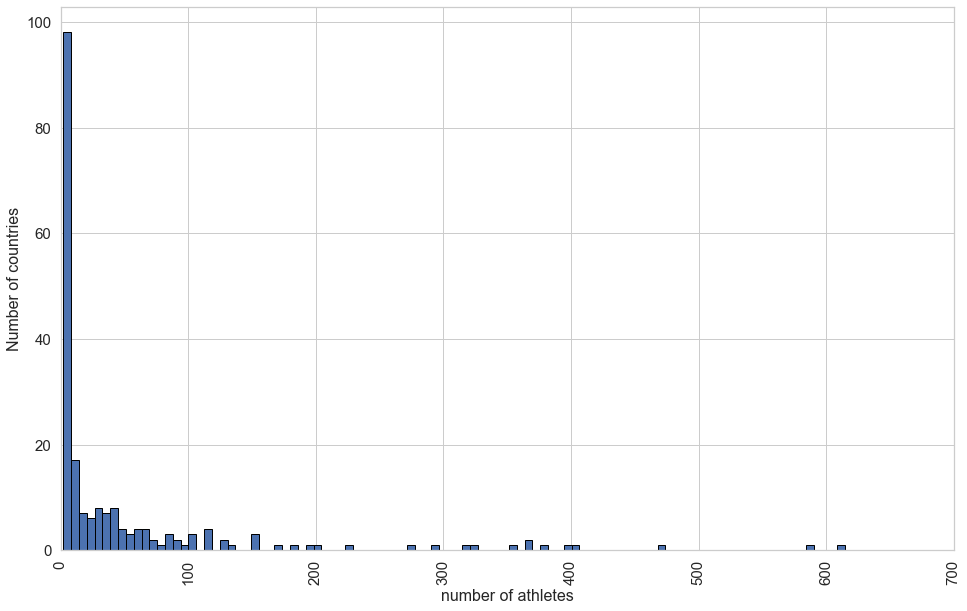

In [8]:
# write you code here

sns.set_style('whitegrid')
plt.figure(figsize=(16, 10))
plt.hist(df, bins = 100, edgecolor='black')
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlim([0,700])
_ = plt.xlabel('number of athletes', fontsize=16)
_ = plt.ylabel('Number of countries', fontsize=16)

## **(Tutorial) Quantizing data**

In [9]:
# create 20 random numbers in the range (0,100)
small_counts = np.random.randint(0, 100, 20) 
small_counts

array([21, 65, 23, 19,  3, 55, 46,  7, 79, 86, 44, 52, 32, 51, 40, 51, 66,
       76,  6, 13])

In [10]:
# divided by 10 to project digits into the range (0,10) 
np.floor_divide(small_counts, 10)

array([2, 6, 2, 1, 0, 5, 4, 0, 7, 8, 4, 5, 3, 5, 4, 5, 6, 7, 0, 1])

In [11]:
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222]
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

### Example: computing deciles of Yelp business review counts
Yelp_academic_dataset_business
https://github.com/melqkiades/yelp/blob/master/notebooks/yelp_academic_dataset_business.json

In [12]:
import json

In [19]:
def load_json_df(filename, num_bytes = -1):
    '''Load the first `num_bytes` of the filename as a json blob, convert each line into a row in a Pandas data frame.'''
    fs = open(filename, encoding='utf-8')
    df = pd.DataFrame([json.loads(x) for x in fs.readlines(num_bytes)])
    fs.close()
    return df

In [20]:
biz_df = load_json_df('/Users/laptopcheckout/Downloads/yelp_academic_dataset_business.json')
biz_df.shape

(15585, 15)

In [21]:
biz_df.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,O_X3PGhk3Y5JWVi866qlJg,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",True,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,29,Turf Paradise Race Course,[],-112.092329,AZ,4.0,33.638573,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...",business
1,QbrM7wqtmoNncqjc6GtFaQ,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},True,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,3,Sam's Club Members Only,[],-112.234755,AZ,3.5,33.648545,"{'Parking': {'garage': False, 'street': False,...",business
2,7lbvsGKzhjuX3oJtaXJvOg,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",True,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,7,Forever 21,[],-111.964485,AZ,3.5,33.383123,"{'Parking': {'garage': False, 'street': False,...",business
3,gjxoKVsRJwEoa8zd9XxlAw,"912 W Sycamore Pl\nChandler, AZ 85225","{'Monday': {'close': '19:00', 'open': '06:00'}...",True,"[Pet Services, Pet Boarding/Pet Sitting, Pets]",Chandler,4,Loving Hands Pet Care,[],-111.857818,AZ,5.0,33.356472,{},business
4,V28yjMqyZnbCtabroJN_aA,"1745 W Glendale Ave\nPhoenix, AZ 85021",{},True,"[Veterinarians, Pets]",Phoenix,3,Amec Mid-City Animal Hospital,[],-112.097232,AZ,5.0,33.538493,{},business


In [22]:
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]) 
deciles 

0.1     3.0
0.2     3.0
0.3     4.0
0.4     5.0
0.5     6.0
0.6     8.0
0.7    13.0
0.8    24.0
0.9    56.0
Name: review_count, dtype: float64

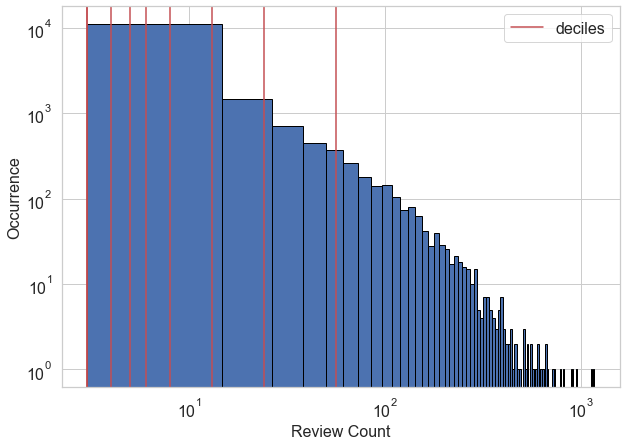

In [23]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
biz_df['review_count'].hist(ax=ax, bins=100, edgecolor='black') 
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=16) 
ax.set_xscale('log', nonpositive='clip')
ax.set_yscale('log', nonpositive='clip')
ax.tick_params(labelsize=16)
_ = ax.set_xlabel('Review Count', fontsize=16) 
_ = ax.set_ylabel('Occurrence', fontsize=16)

## Task 2. Computing the quantiles of the number of athletes from each country and visualizing the histogram (data was used in task 1). Applying log transform on the number of athletes and visualizing the histogram again.

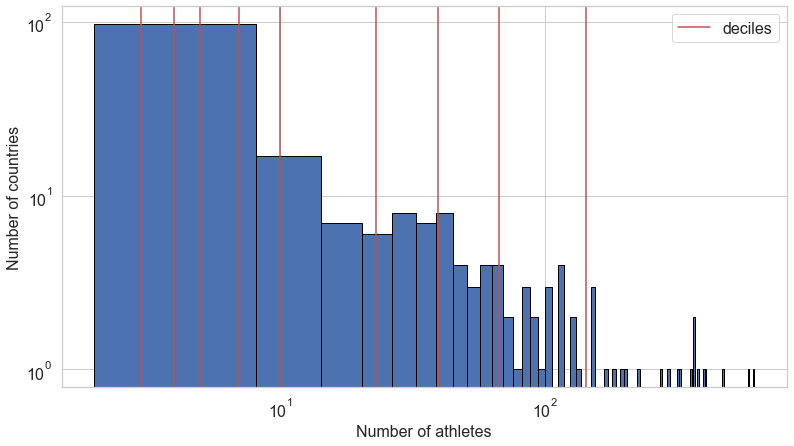

In [13]:
# write the code here

#Creating deciles 
deciles = df.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]) 
deciles 

#Creating Hist plot with deciles
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(13, 7))
df.hist(ax=ax, bins=100, edgecolor='black') 
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=16) 
ax.set_xscale('log', nonpositive='clip')
ax.set_yscale('log', nonpositive='clip')
ax.tick_params(labelsize=16)
_ = plt.xlabel('Number of athletes', fontsize=16)
_ = plt.ylabel('Number of countries', fontsize=16)



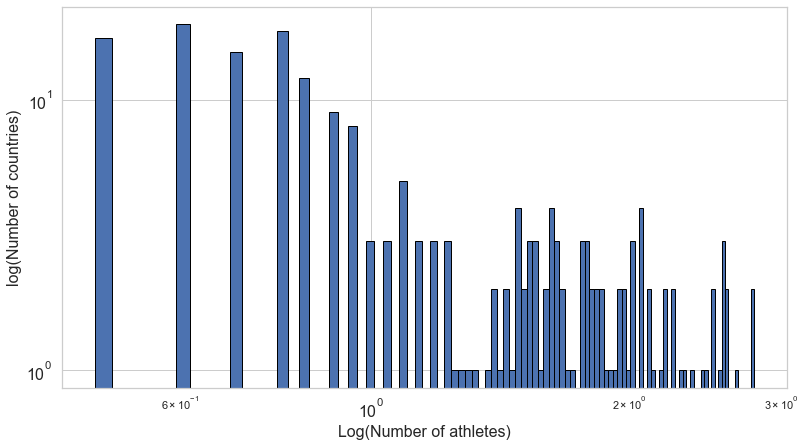

In [90]:
#log transformed Hist
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(13, 7))
df_log = np.log10(df + 1)
df_log.hist(ax=ax, bins=100,  edgecolor='black')
ax.set_xscale('log', nonpositive='clip')
ax.set_yscale('log', nonpositive='clip')
ax.tick_params(labelsize=16)
_ = plt.xlabel('Log(Number of athletes)', fontsize=16)
_ = plt.ylabel('log(Number of countries)', fontsize=16)




## Question 1. Comparing the histograms before and after applying log transform and answer the question: why do we need to apply log transform on some data?

**Answer to Q1**: Type your answer here

**Log transformation is used to reduce the skewness of a graph. This log transformation is done by liner regression. the transformation is tested by r-squared score.

**The difference between the normal and log transformed data is that the skewness of the graph has shifted.**
**This transformation is used to shift the skewness of the graph.**

---


## **(Tutorial) Box-Cox transform**

In [15]:
x = np.arange(0.001, 3, 0.01)
lambda0 = np.log(x)
one_quarter = (x**0.25 - 1)/0.25
square_root = (x**0.5 - 1)/0.5
three_quarters = (x**0.75 - 1)/0.75
one_point_five = (x**1.5 - 1)/1.5

Text(0.5, 1.0, 'Box-Cox Transforms')

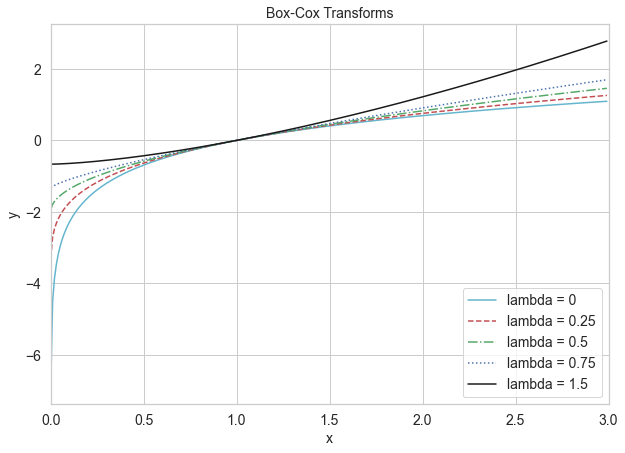

In [16]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(x, lambda0, 'c', 
         x, one_quarter, 'r--', 
         x, square_root, 'g-.', 
         x, three_quarters, 'b:',
         x, one_point_five, 'k')
plt.legend(['lambda = 0', 'lambda = 0.25', 'lambda = 0.5', 'lambda = 0.75', 'lambda = 1.5'], 
           loc='lower right',
           prop={'size': 14})
ax.tick_params(labelsize=14)
ax.set_xlim([0.0,3.0])
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_title('Box-Cox Transforms', fontsize=14)

## Example: Visualizing the histograms of original, log transformed, and Box-Cox transformed review counts

In [17]:
from scipy import stats

In [44]:
rc_log = stats.boxcox(biz_df['review_count'], lmbda=0)
rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
biz_df['rc_bc'] = rc_bc
biz_df['rc_log'] = rc_log

Text(0, 0.5, 'Occurrence')

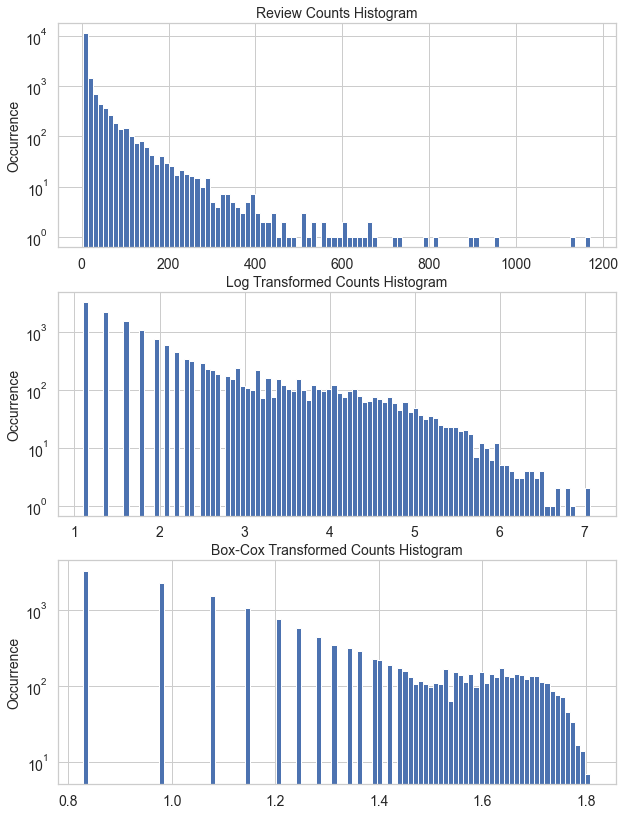

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 14))

# 원본 리뷰 카운트 히스토그램
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log', nonpositive='clip')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# 로그 변환된 리뷰 카운트
biz_df['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log', nonpositive='clip')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

# Box-Cox 변환된 리뷰 카운트
biz_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log', nonpositive='clip')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

## **Task 3. Visualizing the histograms of original, log transformed, and Box-Cox transformed athletes numbers (data used in task 1 and task 2)**

<ipython-input-83-acb9e643d2ad>:33: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


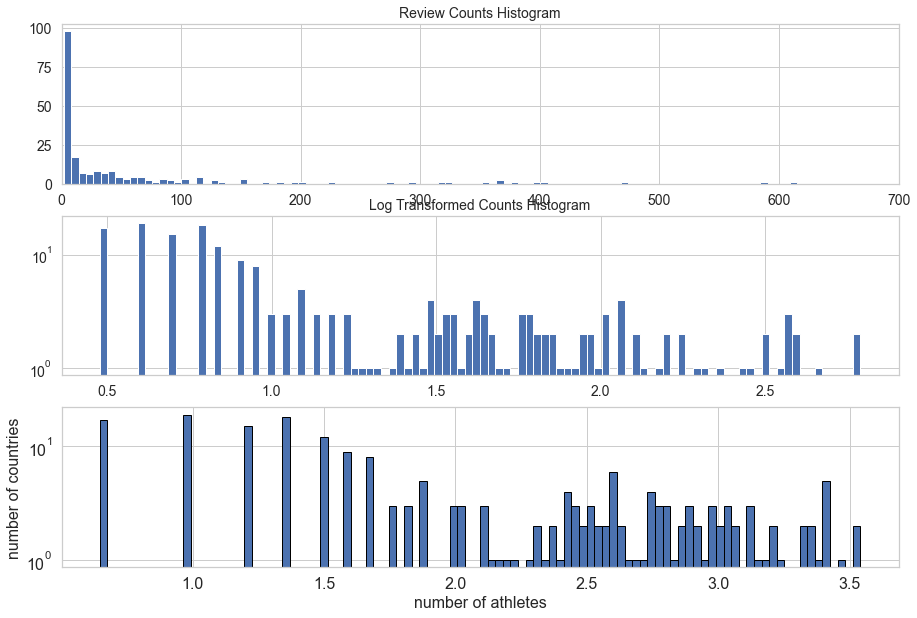

In [83]:
# write your code here

df_box = stats.boxcox(df, lmbda=0)
rc_bc, bc_params = stats.boxcox(df)
rc=rc_bc
bc_params

# creating plots
fig, (ax1, ax2,ax3) = plt.subplots(3,1, figsize=(15, 10))

# Review Counts Histogram
df.hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlim(0,700)
_ = plt.xlabel('number of athletes', fontsize=16)
_ = plt.ylabel('number of countries', fontsize=16)

# Log Transformed Counts Histogram
df_log.hist(ax=ax2, bins=100)
ax2.set_yscale('log', nonpositive='clip')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
_ = plt.xlabel('number of athletes', fontsize=16)
_ = plt.ylabel('number of countries', fontsize=16)

# Box-Cox
plt.hist(rc, bins = 100, edgecolor='black')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.yscale('log', nonposy='clip')
_ = plt.xlabel('number of athletes', fontsize=16)
_ = plt.ylabel('number of countries', fontsize=16)


## Question 2. Listing another transform method other than log and box-cox transform. Explain when to use them.

**Answer to Q2:** write your answer here

**Square Root transformation method - this is used when data is moderately skewed. Transformation has a moderate effect on distribution shape **
**arcsine transformation method- if the given data is of ordinal data type then this transformation is used**

---


## Feature scaling example
**Online News Popularity Dataset**: https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip

In [43]:
import sklearn.preprocessing as preproc

In [44]:
news_df = pd.read_csv('/Users/laptopcheckout/Downloads/OnlineNewsPopularity/OnlineNewsPopularity.csv', delimiter=', ',engine = 'python') 
news_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [45]:
# Min-max scaling
news_df['minmax'] = preproc.minmax_scale(news_df[['n_tokens_content']])
news_df['minmax'].values

array([0.02584376, 0.03009205, 0.02489969, ..., 0.05215955, 0.08048147,
       0.01852726])

In [46]:
# Standardization
news_df['standardized'] = preproc.StandardScaler().fit_transform(news_df[['n_tokens_content']])
news_df['standardized'].values

array([-0.69521045, -0.61879381, -0.71219192, ..., -0.2218518 ,
        0.28759248, -0.82681689])

In [64]:
# L2-normalization
news_df['l2_normalized'] = preproc.normalize(news_df[['n_tokens_content']], axis=0)
news_df['l2_normalized'].values

array([0.00152439, 0.00177498, 0.00146871, ..., 0.00307663, 0.0047472 ,
       0.00109283])

Text(0.5, 39.49999999999994, 'L2-normalized word count')

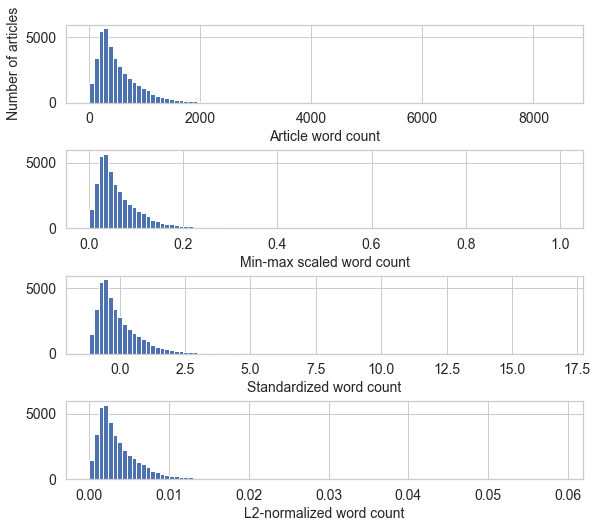

In [65]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8, 7))
fig.tight_layout(h_pad=2.0)

news_df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

news_df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
# ax2.set_ylabel('Number of articles', fontsize=14)

news_df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
# ax3.set_ylabel('Number of articles', fontsize=14)

news_df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
# ax4.set_ylabel('Number of articles', fontsize=14)

##  Task 4. Visualizing the histograms of original and scaled data (the data used in the previous tasks)

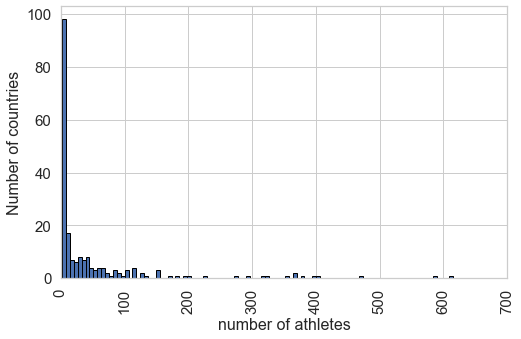

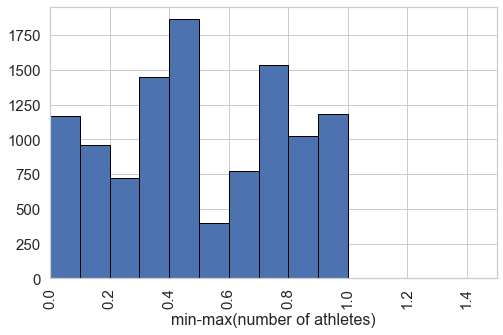

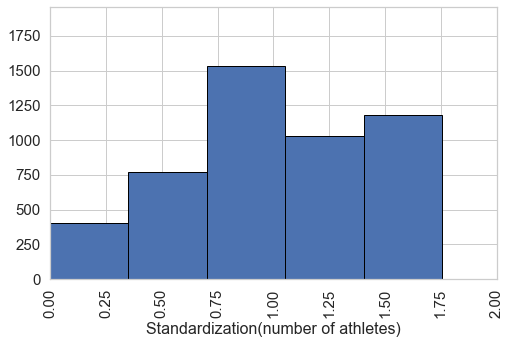

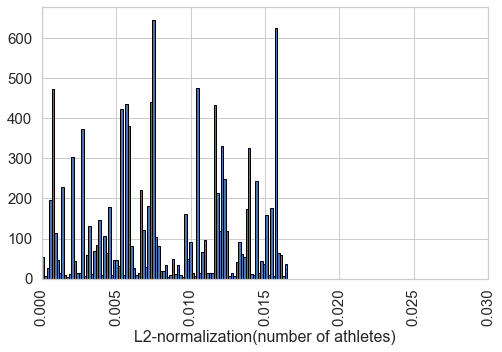

In [79]:
# write your code here

temp_std = athletes_count

# Min-max scaling
df_MinMax = preproc.minmax_scale(temp_std[['NOC_N']])
#print(df_MinMax)

#Standardization
df_Std=preproc.StandardScaler().fit_transform(temp_std[['NOC_N']])
#print(df_Std)

# L2-normalization
df_l2_norm=preproc.normalize(temp_std[['NOC_N']], axis=0)
#print(df_l2_norm)

#plotting
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))
plt.hist(df, bins = 100, edgecolor='black')
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlim([0,700])
_ = plt.xlabel('number of athletes', fontsize=16)
_ = plt.ylabel('Number of countries', fontsize=16)

# Min-max scaling
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))
plt.hist(df_MinMax, bins = 10, edgecolor='black')
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlim([0,1.5])
_ = plt.xlabel('min-max(number of athletes)', fontsize=16)
#_ = plt.ylabel('Number of countries', fontsize=16)


#Standardization
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))
plt.hist(df_Std, bins = 10, edgecolor='black')
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlim([0,2])
_ = plt.xlabel('Standardization(number of athletes)', fontsize=16)
#_ = plt.ylabel('Number of countries', fontsize=16)

# L2-normalization
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))
plt.hist(df_l2_norm, bins = 100, edgecolor='black')
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlim([0,0.03])
_ = plt.xlabel('L2-normalization(number of athletes)', fontsize=16)
#_ = plt.ylabel('Number of countries', fontsize=16)



## Question 3. Comparing the four histograms, listing the similarities and differences between them.

**Answer to Q3**: type your answer here

**Models that are smooth functions of the input, such as linear regression, logistic regression, or anything that involves a matrix, are affected by the scale of the input.**

**An alternative approach to Z-score normalization (or standardization) is the so-called Min-Max scaling.In this approach, the data is scaled to a fixed range - usually 0 to 1.The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.Min-max scaling squeezes (or stretches) all feature values to be within the range of [0, 1]**

**L2-Normalization technique typically modifies/rescales the dataset values in a way that in each row the sum of the squares will always be up to 1.L2-Normalization is a type of normalization from 2 types L1,L2.**

**"Standardization" typically means that the range of values are "standardized" to measure how many standard deviations the value is from its mean.It can even be called as variance scaling.The resulting scaled feature has a mean of 0 and a variance of 1.
In the first graph, the data is a kind of raw data and it is hard to visualize as some of parts of data as it is too less when compared to the other number of the same data.So by applying Normailization,standardization the data can be better be visualized and used.**


---


## Question 4. Comparing the histograms of feature scaling and the histograms of transforms, listing the main difference between them.

**Answer to Q4:** type your answer here

Transformation is generally applied on the data.To get the better representaion of the data as due to tranformations the data go through several techniques, due to which even the lowest value would be clearly visible and can be well understood.


---


## Example of interaction features in prediction

In [66]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preproc

In [67]:
news_df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [68]:
features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
            'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 
            'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus',
            'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world']

In [69]:
X = news_df[features]
y = news_df[['shares']]

X.shape

(39644, 17)

In [70]:
X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X)
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, test_size=0.3, random_state=123)

In [71]:
def evaluate_feature(X_train, X_test, y_train, y_test):
    """Fit a linear regression model on the training set and score on the test set"""
    model = linear_model.LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

In [72]:
(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
print("R-squared score with singleton features: %0.5f" % r1)

(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)
print("R-squared score with pairwise features: %0.10f" % r2)

R-squared score with singleton features: 0.00924
R-squared score with pairwise features: 0.0113278613


## Task 5. Interaction features in prediction with dry bean dataset
**Dry bean dataset**: https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip

**note:** Try to encode categorical data into numeric data (the last column 'class') first.
Then apply the interation features and compare the r-squared scores of the singleton features and the interaction features

In [87]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preproc

In [89]:
# write your code here
bean_count = pd.DataFrame(pd.read_excel('/Users/laptopcheckout/Downloads/DryBeanDataset/Dry_Bean_Dataset.xlsx'))
bean_count.to_csv('/Users/laptopcheckout/Downloads/DryBeanDataset/Dry_Bean_Dataset_cs.csv',index = None,header=True)
bean_count

label_encoder= preprocessing.LabelEncoder()
bean_count['class_en']= label_encoder.fit_transform(bean_count['Class'])
d = bean_count['class_en'].value_counts()
d_count=d
bean_count.columns

#creating Feature

features=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'] 
X = bean_count[features]
y = bean_count[['class_en']]


X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X)


#creating the training
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, test_size=0.3, random_state=123)

X.shape

def evaluate_feature(X_train, X_test, y_train, y_test):
    """Fit a linear regression model on the training set and score on the test set"""
    model = linear_model.LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)
(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
print("R-squared score with singleton features: %0.5f" % r1)

(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)
print("R-squared score with pairwise features: %0.10f" % r2)


R-squared score with singleton features: 0.57668
R-squared score with pairwise features: -0.1510582982
